In [3]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.cm
from scipy.stats import gamma
from numba import jit
import matplotlib
import pickle
import pandas as pd

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 

# Simple figure

In the simple figures, I'll just sketch out normal distributions. For the noisy one, I'll use a normal distribution.


In [4]:
cmap = matplotlib.cm.get_cmap('Reds')

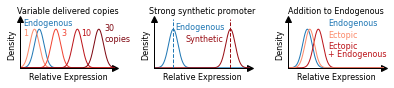

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (420.0/75, 100/75))



for i in range(3):
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_linewidth(1)
    ax[i].spines["bottom"].set_linewidth(1)

    #ax[i].spines["left"].set_position(("data", 0))
    #ax[i].spines["bottom"].set_position(("data", 0))
    ax[i].plot(1, 0, ">k", transform=ax[i].get_yaxis_transform(), clip_on=False)
    ax[i].plot(0, 1, "^k", transform=ax[i].get_xaxis_transform(), clip_on=False)
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylabel("Density", fontsize = 8)
    ax[i].set_xlabel("Relative Expression", fontsize = 8)

x = np.linspace(0, 1, 200)
mu = 0.2
sigma = .05
endogenous = np.exp(- (x - mu) * (x - mu) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
mu2 = 0.8
ectopic = np.exp(- (x - mu2) * (x - mu2) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
ax[0].plot(x, endogenous, linewidth = 1, label = "endogenous")
ax[1].plot(x, endogenous, linewidth = 1, label = "endogenous")
ax[2].plot(x, endogenous, linewidth = 1, label = "endogenous")
    

ax[0].set_title("Variable delivered copies", fontsize = 8)

ax[0].plot(x, np.exp(- (x - (mu-.05)) * (x - (mu-.05)) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "1 copies", color = cmap(0.4))
ax[0].plot(x, np.exp(- (x - (mu-.05)*2.5) * (x - (mu-.05)*2.5) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "3 copies", color = cmap(0.6))
ax[0].plot(x, np.exp(- (x - (mu-.05)*4) * (x - (mu-.05)*4) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "10 copies", color = cmap(0.8))
ax[0].plot(x, np.exp(- (x - (mu-.05)*5.5) * (x - (mu-.05)*5.5) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "30 copies", color = cmap(0.95))


#ax[1].legend(fontsize = 20)
ax[0].annotate("Endogenous", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu - .17,  1.1*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = "C0")

ax[0].annotate("1", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu-.17,  .85*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.4))
ax[0].annotate("3", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.08 + (mu+.05)*0.6 ,  .85*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.6))
ax[0].annotate("10", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.08 + (mu+.05)*1.45 ,  .85*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.8))
ax[0].annotate("30\ncopies", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.08 + (mu+.05)*2.4 ,  .7*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.95))


    
ax[1].set_title("Strong synthetic promoter", fontsize = 8)


ax[1].plot(x, ectopic, linewidth = 1, label = "ectopic", color = cmap(0.9))
ax[1].axvline(x = mu, color = "C0", linestyle = "--", linewidth = 1)
ax[1].axvline(x = mu2, color = cmap(0.9), linestyle = "--", linewidth = 1)
#ax[0].annotate('', xy=(mu, 4), xytext=(mu2,4),
#            arrowprops=dict(arrowstyle='<->', color='red', linewidth = 1, 
#                            mutation_scale = 10))
ax[1].annotate("Endogenous", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu + sigma/2,  1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = "C0")

ax[1].annotate("Synthetic", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu2 - .47,  0.7/np.sqrt(2 * np.pi * sigma**2)), 
               fontsize = 8, color = cmap(0.9))






ax[2].set_title("Addition to Endogenous", fontsize = 8)
#ax[2].plot(x, gamma.pdf(x, 4, scale = 0.1), linewidth = 1, color = cmap(0.9), label = "ectopic")

ax[2].annotate("Endogenous", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu + .22 ,  1.1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = "C0")
ax[2].plot(x, np.exp(- (x - (mu+.115)) * (x - (mu+.115)) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "1 copies", color = cmap(0.8))

ax[2].plot(x, np.exp(- (x - (mu+.025)) * (x - (mu+.025)) / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2), 
           linewidth = 1, label = "1 copies", color = cmap(0.4))

ax[2].annotate("Ectopic", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.22 ,  .8*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.4))

ax[2].annotate("Ectopic", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.22 ,  .5*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.8))

ax[2].annotate("+ Endogenous", 
               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
               xytext= (mu+.22 ,  .3*1/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.8))

#ax[2].annotate("Noisy promoter", 
#               xy = (mu,  1/np.sqrt(2 * np.pi * sigma**2)), 
#               xytext= ((mu + sigma/2)*1.8,  0.3/np.sqrt(2 * np.pi * sigma**2)), fontsize = 8, color = cmap(0.9))

#ax[2].legend(fontsize = 20)
#ax[2].set_xscale("log")
plt.tight_layout()
plt.savefig("failuremodes.pdf")
plt.show()

# Simulations

This document contains code to make the IFFL simulations from "Figure 0" or "Figure 1". This simulation includes a state model of bursty gene expression of an mRNA, as well as Michaelis-Menten kinetics of the RISC complex. 

\begin{align}
l&: \text{on rate [per hour]} \\
\mu&: \text{off rate [per hour]} \\
\nu&: \text{transcription rate in on state [per hour]} \\
d &: \text{degradation rate of transcript [per hour]}
\end{align}

If the degradation rate $d$ is 1 per 8 hours, and the on rate is once per hour, the off rate is once per hour, and the transcription rate is 80 per hour, then we would expect the gene to be transcribing for 4 hours on average, producing 320 transcripts.

In [4]:
l = 8.0/8
d = 1.0/8
gm = 1.0/24
mu = 1
nu = 80
k =  gm / 20
#k=0
#gm = 0

@jit(nopython = True)
def simulate_IFFL(num, l, d, gm, mu, nu, k, p = 1):
    dist = np.zeros((num,3))
    for i in range(dist.shape[0]):
        state = ("I", 0, 0) 
        active, n, m = state
        t = 0
        
        choice = np.random.rand()
        if choice > p:
            dist[i,0] = 0
            dist[i,1] = 0
            dist[i,2] = 0    
            continue
    
        while t < 200:
            choice = np.random.rand()
            if active == "I":
                t += np.random.exponential(1/(l + n*d + gm*m + k * m * n))
                if choice < l/(l + n*d + gm*m + k*m*n):
                    ## turn on
                    active = "A"
                elif choice < (l+n*d)/(l + n*d + gm*m + k*m*n):
                    ## degrade protein
                    n = n-1
                elif choice < (l + n*d + gm*m)/ ( l + n*d + gm*m + k*m*n):
                    m = m-1
                else: 
                    n = n-1
            elif active == "A":
                t += np.random.exponential(1/(mu + n*d + nu + gm*m + k*m*n)) 
                if choice < mu/(mu + n*d + nu+gm*m + k*m*n):
                    # turn off
                    active = "I"
                elif choice < (mu + n*d) / (mu + n*d + nu + gm*m + k*m*n):
                    ## degrade protein
                    n = n - 1
                elif choice < (mu + n*d + nu) / (mu + n*d + nu + gm*m + k * m * n): 
                    ## produce mRNA and miRNA
                    n = n + 1
                    m = m + 1
                elif choice < (mu + n*d + nu + gm*m)/ (mu + n*d + nu + gm*m + k*m*n):
                    m = m - 1
                else:
                    n = n - 1
            else:
                print("Broken!!")
            
        dist[i,0] = t
        dist[i,1] = n
        dist[i,2] = m

    return dist


## includes poisson distributed # of genomes
@jit(nopython = True)
def simulate_IFFL2(num, l, d, gm, mu, nu, k, p):
    assert(p < 1)
    assert(p > 0)
    dist = np.zeros((num,4))
    for i in range(dist.shape[0]):
        state = (0, 0, 0) 
        active, n, m = state
        t = 0
        
        ## p = e^{-\lambda}
        ## \lambda = - \ln p
        
        num_genomes = np.random.poisson(-np.log(1-p))
        if num_genomes == 0:
            dist[i,0] = 0
            dist[i,1] = 0
            dist[i,2] = 0
            dist[i,3] = 0
            continue
    
        while t < 200:
            choice = np.random.rand()
            denom = (l*(num_genomes - active) + (mu + nu)*active + n*d + gm*m + k * m * n)
            t += np.random.exponential(1/denom)
            if choice < l*(num_genomes-active)/denom:
                ## turn on
                active = active + 1 
            elif choice < (l*(num_genomes-active)+ mu*active)/denom:
                ## turn off
                active = active - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active)/denom:
                # produce mRNA and miRNa
                n = n+1 # mRNA
                m = m+1 # miRNA
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + n*d)/denom:
                # degrade mRNA
                n = n - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + n*d + gm*m)/denom:
                # degrade miRNA
                m = m - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + n*d + gm*m + k*m*n)/denom:
                # miRNA degrades mRNA
                n = n-1
            else:
                print("Broken!!")
            
        dist[i,0] = t
        dist[i,1] = n
        dist[i,2] = m
        dist[i,3] = num_genomes

    return dist

$$ P(x)=  \frac{e^{-\lambda}\lambda^k}{k!} $$

$$ 1-p =  P(0)=  \frac{e^{-\lambda}\lambda^0}{0!} = e^{-\lambda} $$

$$ \lambda = - \log (1-p)$$

(array([0.04919679, 0.15060241, 0.22991968, 0.21787149, 0.1626506 ,
        0.09839357, 0.05421687, 0.02208835, 0.01506024]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <BarContainer object of 9 artists>)

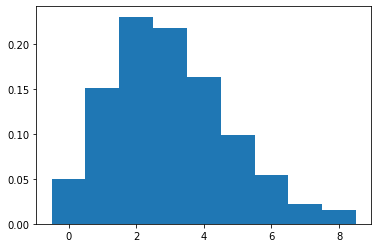

In [112]:
samples = np.random.poisson(-np.log(1-.95), 1000)
plt.hist(samples, bins = np.arange(10)-0.5, density = True)

In [41]:
dist_endogenous = simulate_IFFL(100000,
 l= 2.5/8, d = 1.0/8, mu = 20, nu= 80, k =0, gm = 1/24.0)[:,1]

dist_regulated = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 360,
    k =  gm / 20                                                 
)[:,1]

dist_unregulated = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 360,
    k =  0                                                       
)[:,1]
#simulate_IFFL(1)[:]

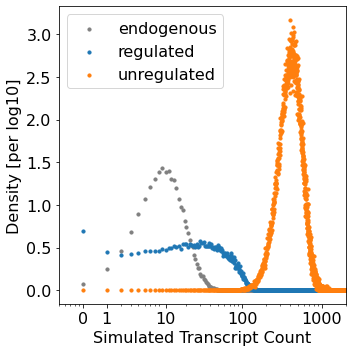

In [42]:
plt.figure(figsize = (5,5))
plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 1000001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey",  s= 10)


reg_hist,_ = np.histogram(dist_regulated, bins = ns - 0.5)
plt.scatter(ns[1:],reg_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "regulated", s = 10)


unreg_hist,_ = np.histogram(dist_unregulated, bins = ns - 0.5)
plt.scatter(ns[1:],unreg_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "unregulated", s = 10)





plt.xlim(.5, 2000)
plt.legend(fontsize = 16)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Simulated Transcript Count", fontsize = 16)
plt.ylabel("Density [per log10]", fontsize = 16)
plt.tight_layout()
plt.show()


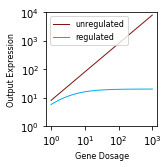

In [14]:
plt.figure(figsize = (175.0/72,175.0/72))
d = 1/8.0
plt.xscale("log")
plt.yscale("log")
D = np.logspace(0,3, 200)

#plt.gca().add_patch(Rectangle((1,100), 1000, 9900, facecolor = "#FFCACA", label = "harmful"))


#plt.gca().add_patch(Rectangle((1,1), 1000, 50, facecolor = "#EAE3C9", label = "therapeutic"))
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4])
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4])
plt.plot(D,D/d, label = "unregulated", linewidth = 1, color = "#7F1517")

plt.plot(D, D / (d +  D/20  ), label = "regulated", linewidth = 1, color= "#00AEEF")
plt.ylabel("Output Expression", fontsize = 8)
plt.xlabel("Gene Dosage", fontsize =8)
plt.ylim(1e0, 1e4)
plt.legend(fontsize = 8, loc = "upper left")
plt.tight_layout()
plt.savefig("therapeuticIFFL.pdf")
plt.show()

In [124]:
dist_endogenous = simulate_IFFL(100000,
 l= 2.5/8, d = 1.0/8, mu = 20, nu= 80, k =0, gm = 1/24.0)[:,1]

dist_lowtransduction = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 80,
    k =  0,
    p = 0.05
)[:,1]


dist_medtransduction = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 80,
    k =  0,
    p = 0.3
)[:,1]

dist_hightransduction = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 80,
    k =  0,
    p = 0.85
)[:,1]


In [125]:
dist_lowtransduction_reg = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 80,
    k =  6.0/24/20,
    p = 0.05
)[:,1]


dist_medtransduction_reg = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 6,
    nu = 80,
    k =  6.0/24/20,
    p = 0.3
)[:,1]



dist_hightransduction_reg = simulate_IFFL(100000,
    l = 8.0/8,
    d = 1.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 80,
    k =  6.0/24/20,
    p = 0.85
)[:,1]


C:\Users\mflyn\AppData\Local\Temp/ipykernel_44036/2107957614.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mflyn\AppData\Local\Temp/ipykernel_44036/2107957614.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem.pdf")
C:\Users\mflyn\AppData\Local\Temp/ipykernel_44036/2107957614.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem.pdf")
C:\Users\mflyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


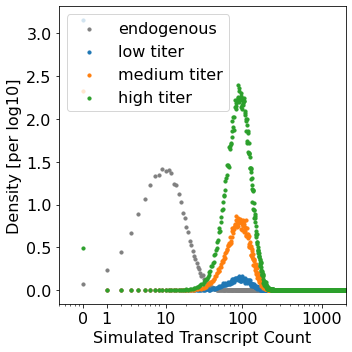

In [126]:
plt.figure(figsize = (5,5))
plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey",  s= 10)

#plt.plot(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey")

low_hist,_ = np.histogram(dist_lowtransduction, bins = ns - 0.5)
plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", s = 10)
#plt.plot(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer")


med_hist,_ = np.histogram(dist_medtransduction, bins = ns - 0.5)
plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", s = 10)
#plt.plot(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer")


high_hist,_ = np.histogram(dist_hightransduction, bins = ns - 0.5)
plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", s = 10)
#plt.plot(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(.5, 2000)
plt.legend(fontsize = 16)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Simulated Transcript Count", fontsize = 16)
plt.ylabel("Density [per log10]", fontsize = 16)
plt.tight_layout()
#plt.savefig("Problem.pdf")
plt.show()


Text(0, 0.5, 'Cumulative Density')

C:\Users\mflyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


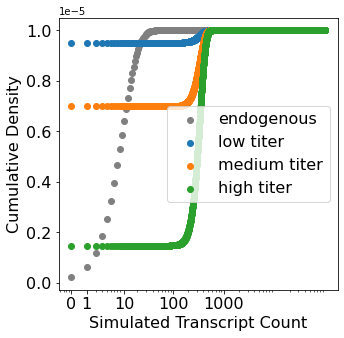

In [14]:
plt.figure(figsize = (5,5))
plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5, density = True)
plt.scatter(ns[1:],[endogenous_hist[:i].sum()/100000 for i in ns[1:]], label = "endogenous", color = "grey")

low_hist,_ = np.histogram(dist_lowtransduction, bins = ns - 0.5, density = True)
plt.scatter(ns[1:],[low_hist[:i].sum()/100000 for i in ns[1:]], label = "low titer")

med_hist,_ = np.histogram(dist_medtransduction, bins = ns - 0.5, density = True)
plt.scatter(ns[1:],[med_hist[:i].sum()/100000 for i in ns[1:]], label = "medium titer")


high_hist,_ = np.histogram(dist_hightransduction, bins = ns - 0.5, density = True)
plt.scatter(ns[1:],[high_hist[:i].sum()/100000 for i in ns[1:]], label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


#plt.xlim(0, 3)
plt.legend(fontsize = 16)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Simulated Transcript Count", fontsize = 16)
plt.ylabel("Cumulative Density", fontsize = 16)

#plt.savefig("Problem.svg")

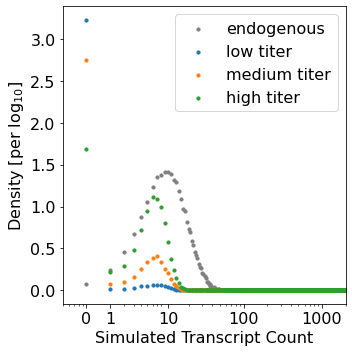

In [30]:
plt.figure(figsize = (5,5))

plt.xscale("log")
ns = np.arange(0, 100001)


endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey", s=10)

low_hist,_ = np.histogram(dist_lowtransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", s = 10)

med_hist,_ = np.histogram(dist_medtransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", s = 10)

high_hist,_ = np.histogram(dist_hightransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", s = 10)


#plt.hist(np.log10(1+ dist_endogenous), bins = np.log10(ns), label = "endogenous", density = True, histtype = "step", linewidth = 3, color = "grey")
#plt.hist(np.log10(1+ dist_endogenous), bins = ns, label = "endogenous", density = True, histtype = "step")

#plt.hist(np.log10(1+dist_lowtransduction_reg), bins = np.log10(ns), label = "low titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.hist(np.log10(1+dist_medtransduction_reg), bins = np.log10(ns), label = "medium titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.hist(np.log10(1+dist_hightransduction_reg), bins = np.log10(ns), label = "high titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


#plt.xlim(0, 3)
plt.xlim(.5, 2000)

plt.legend(fontsize = 16)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Simulated Transcript Count", fontsize = 16)
plt.ylabel("Density [per log$_{10}$]", fontsize = 16)
plt.tight_layout()
#plt.savefig("Problem_Solution.pdf")

In [5]:
dist_endogenous = simulate_IFFL(2000000,
 l= 2.5/8, d = 1.0/8, mu = 20, nu= 80, k =0, gm = 1/24.0)[:,1]

dist_lowtransduction = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  0,
    p = 0.5 #0.10
)[:,1]


dist_medtransduction = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  0,
    p = 0.95 # 0.5
)[:,1]

dist_hightransduction = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  0,
    p = 0.9999 # 0.95
)[:,1]


In [6]:
dist_lowtransduction_reg = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  3.0/24/20,
    p = 0.5 #0.10 
)[:,1]


dist_medtransduction_reg = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  3.0/24/20,
    p = 0.95 #0.5
)[:,1]



dist_hightransduction_reg = simulate_IFFL2(2000000,
    l = 8.0/8,
    d = 4.0/8,
    gm = 1.0/24,
    mu = 1,
    nu = 60,
    k =  3.0/24/20,
    p = 0.9999 #0.95
)[:,1]


In [36]:
# saving files
simulation = {
    'dist_endogenous' : dist_endogenous,
    'dist_lowtransduction' : dist_lowtransduction,
    'dist_medtransduction' : dist_medtransduction,
    'dist_hightransduction' : dist_hightransduction,
    'dist_lowtransduction_reg' : dist_lowtransduction_reg,
    'dist_medtransduction_reg' : dist_medtransduction_reg,
    'dist_hightransduction_reg' : dist_hightransduction_reg,
    
}

filename = "simulation_{0}.pkl".format(pd.Timestamp.now().strftime("%Y-%m-%d-%H-%M-%S"))

## uncomment to save simulation in pickle file

#file = open(filename, 'wb')
#pickle.dump(simulation, file)
#file.close()

In [21]:
with open('simulation_2023-06-16-20-17-28.pkl', 'rb') as f:
    sim = pickle.load(f)
    
dist_endogenous, dist_lowtransduction, dist_medtransduction, dist_hightransduction, \
dist_lowtransduction_reg, dist_medtransduction_reg, dist_hightransduction_reg = sim.values()
    
sim

{'dist_endogenous': array([16.,  3., 14., ..., 17.,  0., 14.]),
 'dist_lowtransduction': array([ 16.,   0.,  79., ..., 116.,   0.,   0.]),
 'dist_medtransduction': array([156.,  90., 152., ..., 185., 300., 397.]),
 'dist_hightransduction': array([568., 922., 595., ..., 197., 577., 395.]),
 'dist_lowtransduction_reg': array([11.,  1., 11., ...,  1.,  0.,  0.]),
 'dist_medtransduction_reg': array([7., 6., 8., ..., 0., 4., 1.]),
 'dist_hightransduction_reg': array([ 1.,  7.,  4., ...,  1., 13.,  9.])}

C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/4147142074.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/4147142074.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem.pdf")
C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/4147142074.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem.pdf")
C:\Users\mflyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


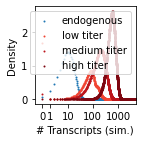

In [22]:
plt.figure(figsize = (150.0/72,150.0/72))
plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
plt.scatter(ns[1:],endogenous_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0",  s= 1)

#plt.plot(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey")

low_hist,_ = np.histogram(dist_lowtransduction, bins = ns - 0.5)
plt.scatter(ns[1:],low_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 1)
#plt.plot(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer")


med_hist,_ = np.histogram(dist_medtransduction, bins = ns - 0.5)
plt.scatter(ns[1:],med_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 1)
#plt.plot(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer")


high_hist,_ = np.histogram(dist_hightransduction, bins = ns - 0.5)
plt.scatter(ns[1:],high_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 1)
#plt.plot(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(.5, 5000)
plt.legend(fontsize = 10)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("# Transcripts (sim.)", fontsize = 10)
plt.ylabel("Density", fontsize = 10)
plt.tight_layout()
plt.savefig("Problem.pdf")
plt.show()


C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/1134350945.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/1134350945.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem_Solution.pdf")
C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/1134350945.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Problem_Solution.pdf")
C:\Users\mflyn\AppData\Local\Temp/ipykernel_62476/1134350945.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mflyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.pri

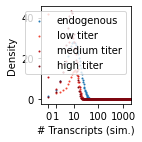

In [12]:
plt.figure(figsize = (150.0/72,150/72))

plt.xscale("log")
ns = np.arange(0, 100001)


endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
plt.scatter(ns[1:],endogenous_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0", s=1)

low_hist,_ = np.histogram(dist_lowtransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],low_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 1)

med_hist,_ = np.histogram(dist_medtransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],med_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 1)

high_hist,_ = np.histogram(dist_hightransduction_reg, bins = ns - 0.5)
plt.scatter(ns[1:],high_hist/2e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 1)


#plt.hist(np.log10(1+ dist_endogenous), bins = np.log10(ns), label = "endogenous", density = True, histtype = "step", linewidth = 3, color = "grey")
#plt.hist(np.log10(1+ dist_endogenous), bins = ns, label = "endogenous", density = True, histtype = "step")

#plt.hist(np.log10(1+dist_lowtransduction_reg), bins = np.log10(ns), label = "low titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.hist(np.log10(1+dist_medtransduction_reg), bins = np.log10(ns), label = "medium titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.hist(np.log10(1+dist_hightransduction_reg), bins = np.log10(ns), label = "high titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


#plt.xlim(0, 3)
plt.xlim(.5, 2000)

plt.legend(fontsize = 10)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("# Transcripts (sim.)", fontsize = 10)
plt.ylabel("Density", fontsize = 10)
plt.tight_layout()
plt.savefig("Problem_Solution.pdf")

plt.tight_layout()

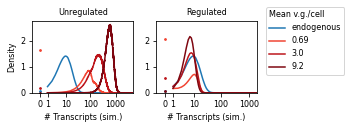

In [55]:
fig, ax = plt.subplots(1,2, figsize = (360.0/72, 135.0/72))
plt.sca(ax[0])

plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
#plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0",  s= 0.3)
plt.plot(ns[2:],endogenous_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "endogenous", color = "C0")
plt.scatter(ns[1],endogenous_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = "C0", s = 3)


#plt.plot(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey")

low_hist,_ = np.histogram(dist_lowtransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "low titer", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)

#plt.plot(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer")


med_hist,_ = np.histogram(dist_medtransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

#plt.plot(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer")


high_hist,_ = np.histogram(dist_hightransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

#plt.plot(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(.5, 5000)
plt.ylim(0, 2.75)

#plt.legend(fontsize = 10)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("# Transcripts (sim.)", fontsize = 8)
plt.ylabel("Density", fontsize = 8)
plt.title("Unregulated", fontsize = 8)


plt.sca(ax[1])

plt.xscale("log")
ns = np.arange(0, 100001)


endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
#plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0", s=0.3)
plt.plot(ns[2:],endogenous_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "endogenous", color = "C0")
plt.scatter(ns[1],endogenous_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = "C0", s = 3)


low_hist,_ = np.histogram(dist_lowtransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 0.69", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "0.69", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)


med_hist,_ = np.histogram(dist_medtransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 3.0", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "3.0", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)


high_hist,_ = np.histogram(dist_hightransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 9.2", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "9.2", color = cmap(0.95))
plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)



#plt.xlim(0, 3)
plt.xlim(.5, 2000)
plt.ylim(0, 2.75)
leg = plt.legend(title = "Mean v.g./cell", fontsize = 8, bbox_to_anchor=(1.05, 0.2), title_fontsize = 8)
leg._legend_box.align = "left"
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("# Transcripts (sim.)", fontsize = 8)
#plt.ylabel("Density", fontsize = 10)
plt.title("Regulated", fontsize = 8)


plt.tight_layout()
plt.savefig("UnregulatedVsRegulatedSim.pdf")
plt.show()

In [358]:
-np.log(1 - 0.5)

0.6931471805599453

In [359]:
-np.log(1 - 0.95)

2.99573227355399

In [365]:
-np.log(1 - 0.9999)

9.210340371976294

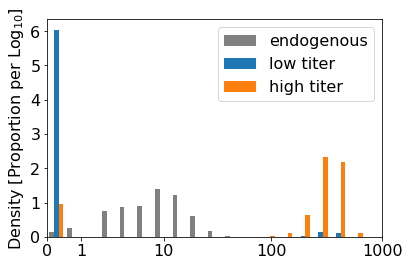

In [17]:
#plt.yscale("log")
ns = np.arange(0, 1000)

ns = np.logspace(0, 3, 20)

plt.hist([np.log10(1+ dist_endogenous),np.log10(1+dist_lowtransduction),np.log10(1+dist_hightransduction)],
         bins = np.log10(ns), 
         #label = "endogenous", 
         density = True, 
         linewidth = 3, 
         color = ["grey", "C0", "C1"],
         label = ["endogenous", "low titer", "high titer"])
#plt.hist(np.log10(1+ dist_endogenous), bins = ns, label = "endogenous", density = True, histtype = "step")

#plt.hist(, bins = np.log10(ns), label = "low titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.hist(, bins = np.log10(ns), label = "high titer", density = True, histtype = "step", linewidth = 3)
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(0, 3)
plt.legend(fontsize = 16)
plt.xticks(ticks = np.log10(1 + np.array([0,1,10,100,1000])), labels = ["0", "1","10","100","1000"], fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Density [Proportion per Log$_{10}$]", fontsize = 16)

plt.savefig("Problem_2.svg")

C:\Users\mflyn\AppData\Local\Temp/ipykernel_14568/4138429301.py:11: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(dist_endogenous), bins = ns, label = "endogenous", density = True)
C:\Users\mflyn\AppData\Local\Temp/ipykernel_14568/4138429301.py:33: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(dist_regulated), bins = ns, label = "regulated", density = True)


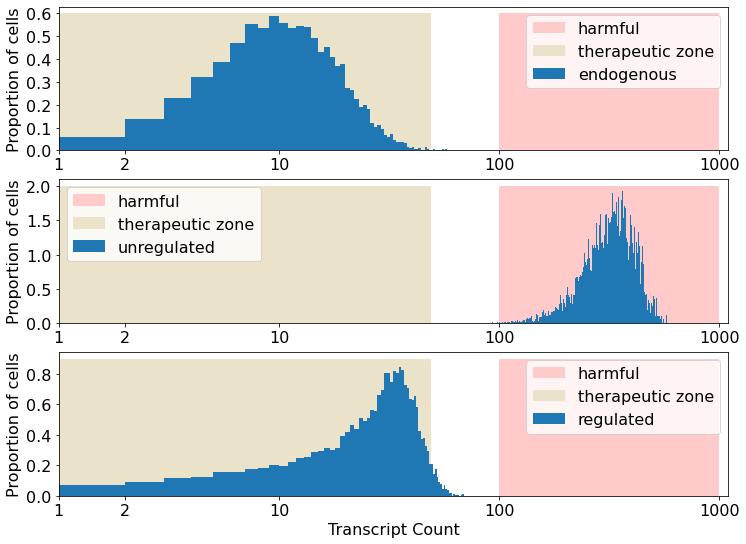

In [18]:
fig, axs = plt.subplots(3,1, figsize = (12,9))

plt.sca(axs[0])

plt.gca().add_patch(Rectangle((np.log(100),0), np.log(10), 0.60, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((0,0), np.log(49), 0.6, facecolor = "#EAE3C9", label = "therapeutic zone"))
ns = np.log(np.arange(1, 100))


plt.hist(np.log(dist_endogenous), bins = ns, label = "endogenous", density = True)
plt.xlim(0, 7)

plt.legend(fontsize = 16)
xbreaks = [1,2,10,100,1000]
plt.xticks(ticks = np.log(xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)

plt.sca(axs[2])

ns = np.log(np.arange(1, 100))
#plt.scatter(ns, ps, label = "ectopic", color = "grey")

#plt.gca().add_patch(Rectangle((100,0), 10, 0.10, facecolor = "#FFCACA", label = "harmful"))

#plt.gca().add_patch(Rectangle((1,0), 49, 0.10, facecolor = "#EAE3C9", label = "therapeutic zone"))
plt.gca().add_patch(Rectangle((np.log(100),0), np.log(10), 0.90, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((0,0), np.log(49), 0.9, facecolor = "#EAE3C9", label = "therapeutic zone"))

plt.hist(np.log(dist_regulated), bins = ns, label = "regulated", density = True)
plt.xlim(0, 7)

plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(ticks = np.log(xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)



plt.sca(axs[1])
ns = np.log( np.arange(1, 600))
#plt.scatter(ns, ps, label = "ectopic", color = "grey")

#plt.gca().add_patch(Rectangle((100,0), 500, 0.007, facecolor = "#FFCACA", label = "harmful"))

#plt.gca().add_patch(Rectangle((1,0), 49, 0.007, facecolor = "#EAE3C9", label = "therapeutic zone"))
plt.gca().add_patch(Rectangle((np.log(100),0), np.log(10), 2, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((0,0), np.log(49), 2, facecolor = "#EAE3C9", label = "therapeutic zone"))


plt.hist(np.log(dist_unregulated), bins = ns, label = "unregulated", density = True)
plt.xlim(0, 7)
#plt.legend()
#plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(ticks = np.log(xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)
 

plt.savefig("regulated.svg")
plt.show()

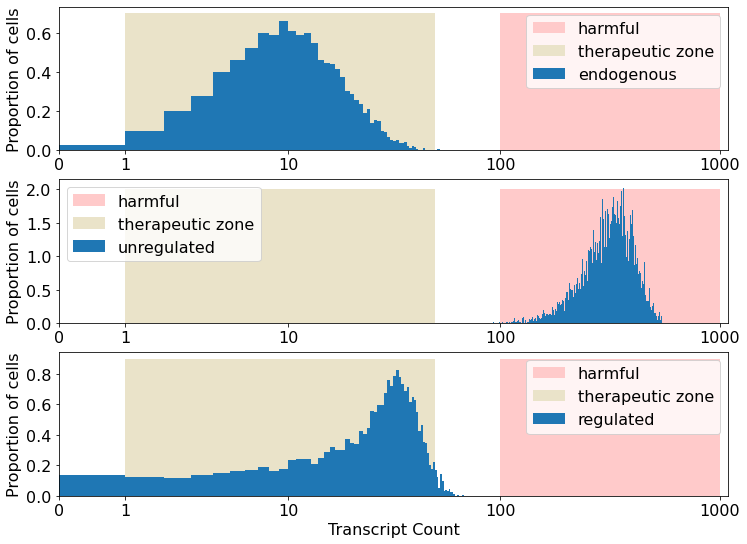

In [515]:
fig, axs = plt.subplots(3,1, figsize = (12,9))

plt.sca(axs[0])

plt.gca().add_patch(Rectangle((np.log(1+100),0), np.log(1+1000) - np.log(1+100), 0.70, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((np.log(1+1),0), np.log(1+50) - np.log(1+1), 0.7, facecolor = "#EAE3C9", label = "therapeutic zone"))
ns = np.log(1+np.arange(0, 100))


plt.hist(np.log(1 + dist_endogenous), bins = ns, label = "endogenous", density = True)
plt.xlim(0, 7)

plt.legend(fontsize = 16)
xbreaks = np.array([0,1,10,100,1000])
plt.xticks(ticks = np.log(1+xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)
#plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)

plt.sca(axs[2])

ns = np.log(1+np.arange(0, 100))
#plt.scatter(ns, ps, label = "ectopic", color = "grey")

plt.gca().add_patch(Rectangle((np.log(1+100),0), np.log(1+1000) - np.log(1+100), 0.90, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((np.log(1+1),0), np.log(1+50) - np.log(1+1), 0.9, facecolor = "#EAE3C9", label = "therapeutic zone"))

plt.hist(np.log(1+dist_regulated), bins = ns, label = "regulated", density = True)

plt.xlim(0, 7)

plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(ticks = np.log(1+xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)



plt.sca(axs[1])
ns = np.log( 1+np.arange(0, 600))
#plt.scatter(ns, ps, label = "ectopic", color = "grey")

plt.gca().add_patch(Rectangle((np.log(1+100),0), np.log(1+1000) - np.log(1+100), 2.0, facecolor = "#FFCACA", label = "harmful"))

plt.gca().add_patch(Rectangle((np.log(1+1),0), np.log(1+50) - np.log(1+1), 2.0, facecolor = "#EAE3C9", label = "therapeutic zone"))


plt.hist(np.log(1+dist_unregulated), bins = ns, label = "unregulated", density = True)
plt.xlim(0, 7)
#plt.legend()
#plt.xlabel("Transcript Count", fontsize = 16)
plt.ylabel("Proportion of cells", fontsize = 16)
plt.legend(fontsize = 16)
plt.xticks(ticks = np.log(1+xbreaks), labels = xbreaks, fontsize = 16)
plt.yticks(fontsize = 16)
 

plt.savefig("regulated.svg")
plt.show()

## For GFOT figure 1

This appears to be the wrong model for figure 1.


In [146]:
dist_unregulated = simulate_IFFL(1000000,
 l= 2/8, d = 1.0/8, mu = 1, nu= 60, k =0,gm = 1/8.0)[:,1]

In [147]:
dist_regulated = simulate_IFFL(1000000,
 l= 2/8, d = 1.0/8, mu = 1, nu= 60, k =1.0/8.0/50.0, gm = 1/24.0)[:,1]

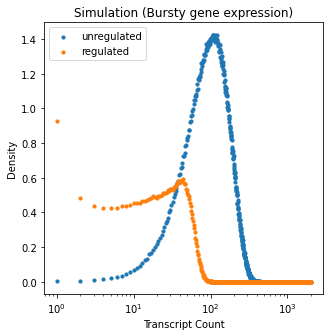

In [156]:
plt.figure(figsize = (5,5))

plt.xscale("log")
ns = np.arange(0, 2001)

unregulated_hist,_ = np.histogram(dist_unregulated, bins = ns - 0.5)
plt.scatter(ns[1:],unregulated_hist/1e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "unregulated", s=10)

regulated_hist,_ = np.histogram(dist_regulated, bins = ns - 0.5)
plt.scatter(ns[1:],regulated_hist/1e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "regulated", s=10)

plt.title("Simulation (Bursty gene expression)")
plt.ylabel("Density")
plt.xlabel("Transcript Count")
plt.legend()

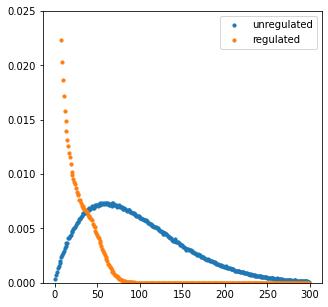

In [162]:
plt.figure(figsize = (5,5))

#plt.xscale("log")
ns = np.arange(0, 300)

unregulated_hist,_ = np.histogram(dist_unregulated, bins = ns - 0.5)
plt.scatter(ns[1:],unregulated_hist/1e6, label = "unregulated", s=10)

regulated_hist,_ = np.histogram(dist_regulated, bins = ns - 0.5)
plt.scatter(ns[1:],regulated_hist[0:]/1e6, label = "regulated", s=10)
plt.ylim(-0.00, .025)
plt.legend()

In [169]:
dist_unregulated = simulate_IFFL(1000,
 l= 20/8, d = 1.0/8, mu = 1, nu= 6, k =0,gm = 1/8.0)[:,1]

In [170]:
dist_regulated = simulate_IFFL(1000,
 l= 20/8, d = 1.0/8, mu = 1, nu= 6, k =1.0/8.0/50.0, gm = 1/24.0)[:,1]

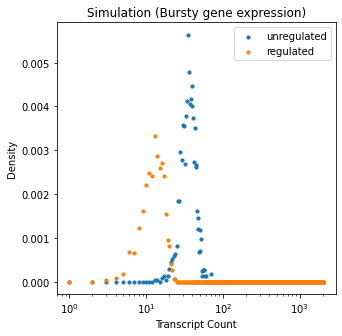

In [171]:
plt.figure(figsize = (5,5))

plt.xscale("log")
ns = np.arange(0, 2001)

unregulated_hist,_ = np.histogram(dist_unregulated, bins = ns - 0.5)
plt.scatter(ns[1:],unregulated_hist/1e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "unregulated", s=10)

regulated_hist,_ = np.histogram(dist_regulated, bins = ns - 0.5)
plt.scatter(ns[1:],regulated_hist/1e6/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "regulated", s=10)

plt.title("Simulation (Bursty gene expression)")
plt.ylabel("Density")
plt.xlabel("Transcript Count")
plt.legend()

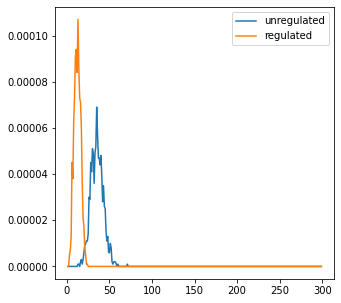

In [177]:
plt.figure(figsize = (5,5))

#plt.xscale("log")
ns = np.arange(0, 300)

unregulated_hist,_ = np.histogram(dist_unregulated, bins = ns - 0.5)
plt.plot(ns[1:],unregulated_hist/1e6, label = "unregulated")#, s=10)

regulated_hist,_ = np.histogram(dist_regulated, bins = ns - 0.5)
plt.plot(ns[1:],regulated_hist[0:]/1e6, label = "regulated")#, s=10)
#plt.ylim(-0.00, .025)
plt.legend()

In this simulation, I use a much simpler model of gene expression, whereby the mRNA is just produced at a constant rate, but that rate is lognormally distributed. 

In [ ]:
from numba import jit




@jit(nopython = True)
def simulate_IFFL_lognormal(num, d, gm, nu, k, p = 1):
    dist = np.zeros((num,3))
    state = (0, 0) 

    for i in range(dist.shape[0]):
        n, m = state
        t = 0
        
        choice = np.random.rand()
        if choice > p:
            dist[i,0] = 0
            dist[i,1] = 0
            dist[i,2] = 0    
            continue
    
        while t < 200:
            choice = np.random.rand()
            t += np.random.exponential(1/(mu + n*d + nu + gm*m + k*m*n)) 
            if choice < (n*d) / (n*d + nu + gm*m + k*m*n):
                ## degrade protein
                n = n - 1
            elif choice < (n*d + nu) / ( n*d + nu + gm*m + k * m * n): 
                ## produce mRNA and miRNA
                n = n + 1
                m = m + 1
            elif choice < (n*d + nu + gm*m)/ (mu + n*d + nu + gm*m + k*m*n):
                    m = m - 1
            else:
                    n = n - 1
            
        dist[i,0] = t
        dist[i,1] = n
        dist[i,2] = m

    return dist